# Tarea 2

Silvia Cárdenas López

# Problema 1

Hacer un programa para encontrar todas las raíces de una función en un intervalo cerrado suponiendo que la función realiza oscilaciones y entre cada oscilación hay al menos una raíz

Se vieron en clase 2 métodos para encontrar raíces: bipartición y Newton. Se observó que el método de Newton resultaba inestable cuando se aplicaba a funciones periódicas. Se  usará por lo tanto el método de bipartición para resolver el problema. Notemos que el programa debe entregar como resultado TODAS las raíces. Deberemos por tanto modificar el programa hecho en clase de tal manera que este corra las veces necesarias para obtener todas las raíces.

En primer lugar consideramos la hipótesis de que entre cada oscilación hay al menos una raíz. Deberemos buscar dentro del intervalo en el que deseamos encontrar todas las raíces una serie de puntos que determinen subintervalos donde se realice una oscilación (por ejemplo, en el caso del seno en el intervalo $[0,3 \pi]$ los subintervalos serán de la forma $[\pi/2,3 \pi/2]$ , $[3 \pi/2, 5 \pi/2]$, ...). Estos puntos corresponden a extremos locales. Programamos una función que encuentre los máximos locales de una función:



In [ ]:
from pylab import *
from numpy import *
%matplotlib inline
from matplotlib import gridspec

In [ ]:
#función para encontrar extremos locales (da al final del array x_der)
def extremo(d_funcion,x_izq,x_der,particion): 
    puntos=[]  #Arreglo donde guardaremos los máximos locales
    x = arange(x_izq,x_der+particion,particion) 
    j=0
    for i in range(len(x)-1):
        if d_funcion(x[i+1])*d_funcion(x[i])<=0:
            puntos = append(puntos,x[i]+particion/2)  
            j+=1 
    puntos =append(puntos, x_der)    
    return  puntos

Programamos ahora los métodos de bipartición y Newton tal y como lo programamos en clase

In [ ]:
def raiz_bip(funcion,x_izq,x_der,mostrar_raices,error=1e-8): 
        raiz = 0.5*(x_izq+x_der)
        y_izq,y_der = funcion(x_izq),funcion(x_der)
        n = 0
        intervalo=[x_izq,x_der]
        while abs(y_der)>=error:
            n += 1
            y_media = funcion(raiz)
            if y_media == 0.:
                break
            if y_media*y_izq < 0:
                x_der = raiz
            else:
                x_izq = raiz
            raiz= 0.5*(x_izq+x_der)
            y_izq,y_der = funcion(x_izq),funcion(x_der)
            if n>=1000:         #Protegemos al proceso en contra de que no se encuentren raices en el intervalo
                raiz =False
                break        
        if (n<100 and mostrar_raices == "sí"):  #Opción para elegir si mostrar las raíces o no
            print ("número de pasos:",n ,",raíz:",raiz, "\n")
        if n>1000:
            raiz = "No hay raíces"
        return  raiz

In [ ]:
def mi_newton_1(func,d_func,x_ini,err=1e-8):
    n=0
    while abs(func(x_ini)) >= err:
        raiz = x_ini - func(x_ini)/d_func(x_ini)
        x_ini = raiz
        n += 1
    return raiz

Ahora modificamos el programa visto en clase de tal manera que la función tome un intervalo, calcule los máximos locales, defina a partir de ellos subintervalos y aplique el método de bipartición para encontrar en cada subintervalo una raíz

In [ ]:
def raiz_bip_osc(funcion,d_funcion,x_izq,x_der,part_max=0.01,error=1e-8):
    extremos = extremo(d_funcion,x_izq,x_der,part_max)
    raiz = []
    for i in range(len(extremos)-1):
        raiz=append(raiz,raiz_bip(funcion,extremos[i],extremos[i+1],"sí"))
    return  raiz

Ponemos ahora en práctica la función usando la función
$$
y(x)=cosx+ \frac{6}{5}sinx^2
$$

In [ ]:
def funcion_prueba(x):
    return cos(x)+(6/5)* sin(x**2)
def d_funcion_prueba(x):
    return -sin(x)+(12/5)*x*cos(x**2)

In [ ]:
raices1= raiz_bip_osc(funcion_prueba,d_funcion_prueba,0,2*pi,part_max=0.001,error=1e-8)

In [ ]:
grafica =subplots(figsize=(10, 6))
x=linspace(0,2*pi)
plot(x,funcion_prueba(x), color ='k')
grid(True)
for i in range(len(raices1)-2):   
    title(' $Raíces \quad de \quad cos x + 6/5 sin x^2$',fontsize = 20)
    xlabel('x',fontsize =15)
    plot(raices1[i+1],[0],'o',label = 'x = %s'%raices1[i+1])
legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1)
show()

# Problema 2

Consideremos la siguiente función:
$$
f(x,y)= 2 e^{-(x+1)^2}(e^{-(y+2)^2}+e^{-(y-2)^2})+6x(x^2+y^2)e^{-(x^2+y^2)}-1
$$

Encontraremos los puntos (x,y) tales que $f(x,y)=0$

In [ ]:
def funcion_2(x,y):
    return 2*exp(-(x+1)**2)*(exp(-(y+2)**2)+exp(-(y-2)**2))+6*x*(x**2+y**2)*exp(-(x**2+y**2))-1
def d_funcion_2(x,y):
    return -12*x**2*(x**2 + y**2)*exp(-x**2 - y**2) + 12*x**2*exp(-x**2 - y**2) + 2*(-2*x - 2)*(exp(-(y + 2)**2) + exp(-(y - 2)**2))*exp(-(x + 1)**2) + 6*(x**2 + y**2)*exp(-x**2 - y**2)

Grafiquemos cortes de la función dada:

In [ ]:
x=linspace(-6,6)
subplots(figsize=(10, 8))
for i in range(10):
    
    plot(x,funcion_2(x,i),label="y=%s"%i)
    xlim([-6,6]),ylim([-4,2])
    axes().set_aspect('equal'),grid(True)
    plt.title(u'Cortes en y' ,fontsize =20 )
    xlabel('x',fontsize =15),ylabel('y',fontsize =15)
legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1)
show()
subplots(figsize=(10, 10))
for i in range(10):
    plot(x,funcion_2(i,x),label="x=%s"%i)
    xlim([-6,6]),ylim([-1.2,2])
    axes().set_aspect('equal'),grid(True)
    plt.title(u'Cortes en x', fontsize =20 )
legend(bbox_to_anchor=(1.05, 1.0), loc=2,ncol=2, borderaxespad=0.1)
show()


De los cortes podemos ver que la función se hace cero para x y y menores a 3. No se espera que haya más ceros a x (o y) mayores debido a que, observando la función vemos que no hay ningún tipo de comportamiento periódico que permita pensar que una vez que las curvas de nivel ya no cruzan el cero otra curva con mayor x (o y )vuelva a hacerlo. 

Para encontrar los puntos en los que la función se hace cero usaremos nuevamente el método de bipartición que programamos en clase, metiendo a nuestra función con una de las dos variables constante, para obtener una función de una sola variable. Luego de eso el programa aplicará el método de bipartición normalmente.

In [ ]:
def new_vec(funcion,d_funcion,indice,a,x_ini,error=1e-8):
    if indice == 1:
        def funcion1var(x):
            return funcion(x,a)
        def d_funcion1var(x):
            return d_funcion(x,a)
    if indice == 2:
        def funcion1var(x):
            return funcion(a,x)
        def d_funcion1var(x):
            return d_funcion(a,x)
    raiz = mi_newton_1(funcion1var,d_funcion1var,x_ini,err=1e-8)
    return raiz

In [ ]:
def bip_vec(funcion,x_izq,x_der,parx,y_izq,y_der,pary,error=1e-8):
    xx  = arange(x_izq,x_der,parx)
    yy  = arange(y_izq,y_der,pary)
    raiz = []
    n = 0
    for i in range(len(xx)):
        def funcion1var(z):
            return funcion(xx[i],z)
        for j in range(len(yy)-1):
            r = raiz_bip(funcion1var,yy[j],yy[j+1],"no",error=1e-8)
            if r != 0 :
                raiz = append(raiz, (xx[i],r ))  #El programa nos entrega una array con las coordenadas de las raíces de la función
                n+=1
    print ("%s raíces encontradas"%n)
    return raiz, n

Ahora usamos esta función para encontrar las raíces de las curvas de corte con y constante y con x variando en el intervalo $[-4,4]$:

Barrido de 0.25 para cada coordenada:

42 raíces encontradas


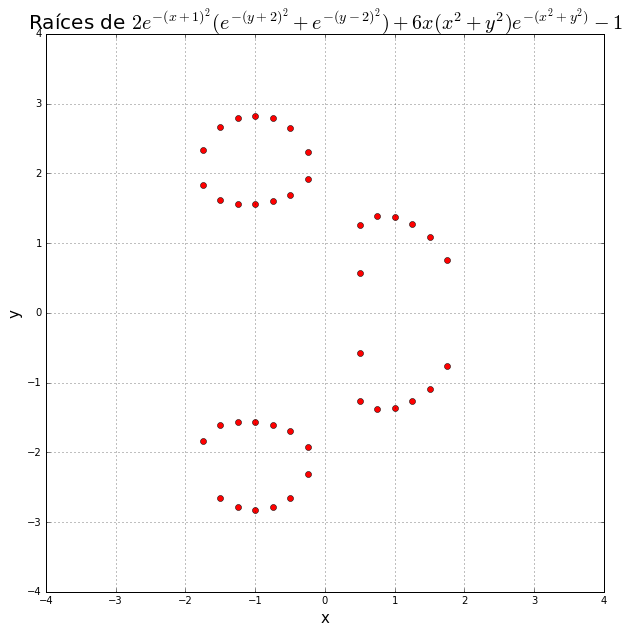

In [13]:
raices, n= bip_vec(funcion_2,-4,4,.25,-4,4,.25,error=1e-8)
subplots(figsize=(10, 10))
for i in range(n):
    plot(raices[2*i],raices[2*i+1],"o",color = 'r')
    plt.title(u'Raíces de $ 2 e^{-(x+1)^2}(e^{-(y+2)^2}+e^{-(y-2)^2})+6x(x^2+y^2)e^{-(x^2+y^2)}-1$', fontsize =20 )
    xlim([-4, 4]),ylim([-4, 4])
    axes().set_aspect('equal'),grid(True)
    xlabel('x',fontsize =15),ylabel('y',fontsize =15)
show()

Barrido de 0.01 para cada coordenada:

98 raíces encontradas


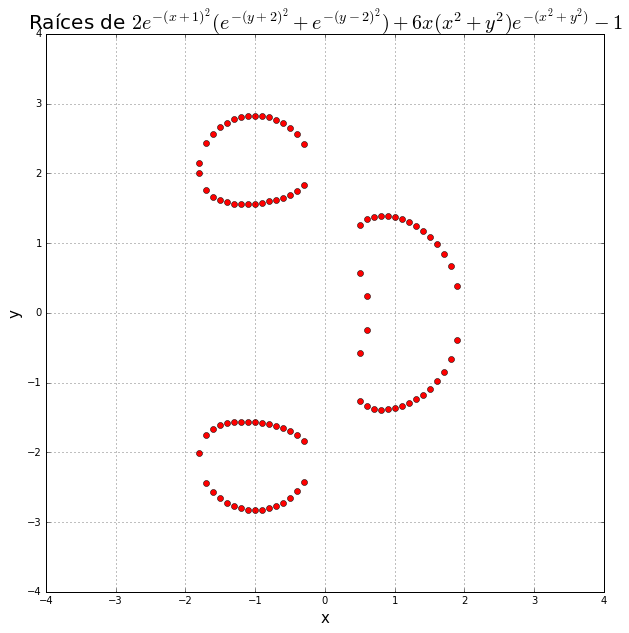

In [246]:
raices, n= bip_vec(funcion_2,-4,4,.1,-4,4,.1,error=1e-8)
subplots(figsize=(10, 10))
for i in range(n):
    plot(raices[2*i],raices[2*i+1],"o",color = 'r')
    plt.title(u'Raíces de $ 2 e^{-(x+1)^2}(e^{-(y+2)^2}+e^{-(y-2)^2})+6x(x^2+y^2)e^{-(x^2+y^2)}-1$', fontsize =20 )
    xlim([-4, 4]),ylim([-4, 4])
    axes().set_aspect('equal'),grid(True)
    xlabel('x',fontsize =15),ylabel('y',fontsize =15)
show()

Barrido de 0.05 para cada coordenada:

196 raíces encontradas


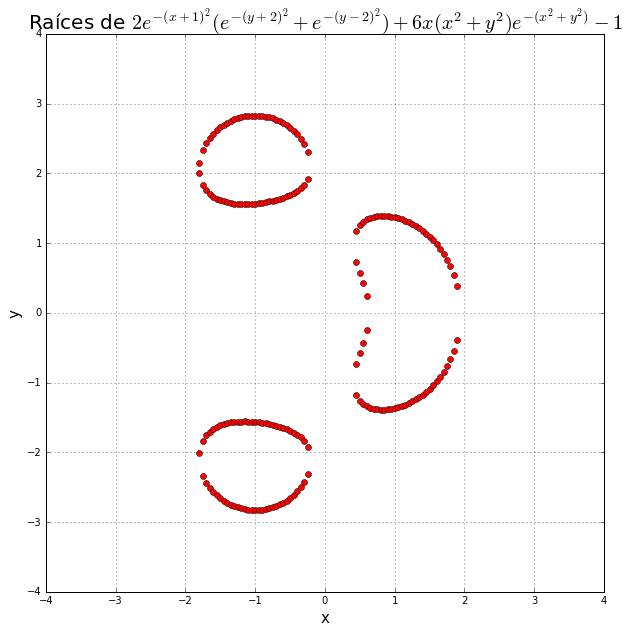

In [248]:
raices, n= bip_vec(funcion_2,-4,4,.05,-4,4,.05,error=1e-8)
subplots(figsize=(10, 10))
for i in range(n):
    plot(raices[2*i],raices[2*i+1],"o",color = 'r')
    plt.title(u'Raíces de $ 2 e^{-(x+1)^2}(e^{-(y+2)^2}+e^{-(y-2)^2})+6x(x^2+y^2)e^{-(x^2+y^2)}-1$', fontsize =20 )
    xlim([-4, 4]),ylim([-4, 4])
    axes().set_aspect('equal'),grid(True)
    xlabel('x',fontsize =15),ylabel('y',fontsize =15)
show()

Barrido de 0.01 en la coordenada y (donde se ve que hay más huecos)

In [ ]:
raices, n= bip_vec(funcion_2,-4,4,.01,-4,4,.01,error=1e-8)
subplots(figsize=(10, 10))
for i in range(n):
    plot(raices[2*i],raices[2*i+1],"o",color = 'r')
    plt.title(u'Raíces de $ 2 e^{-(x+1)^2}(e^{-(y+2)^2}+e^{-(y-2)^2})+6x(x^2+y^2)e^{-(x^2+y^2)}-1$', fontsize =20 )
    xlim([-4, 4]),ylim([-4, 4])
    axes().set_aspect('equal'),grid(True)
    xlabel('x',fontsize =15),ylabel('y',fontsize =15)
show()

# Problema 3

Se tiene una pelota sobre un plano inclinado $\alpha = 15° , 30°, 45°$

a) Dibujar la trayectoria si la pelota es lanzada  a una velocidad $v_{0x}, v_{0y}>0$ considerando que hay fricción proporcional a la velocidad

Programamos el método de Runge-Kutta de 4to orden que usaremos a lo largo del problema

In [ ]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Programamos ahora la ecuación de movimiento de la pelota: Giramos nuestro sistema de referencia de manera que el eje x coincida con el plano. Así, tendremos componentes de la gravedad a lo largo de x y y.

In [ ]:
def e_mov(r_v,t,fric=0,g=9.8,m=1,a): #r_v contiene a las coordenadas x y y y a las velocidades, a es el ángulo de inclinación del plano
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
        dvx,dvy = (g/m)*sin(a),(g/m)*cos(a)
    else:
        dvx = - fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])

Modelos de fricción 

In [ ]:
def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y]) 

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y]) 

In [ ]:
def rebote(r_v_i,mi_dt):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],fric_v)
    y_med = sol[-1,:]
    while abs(y_izq[1]) > 1e-5:
        if y_izq[1]*y_med[1] < 0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t,sol = rk4(e_mov,reinicio,[0,dt_busqueda],fric_v)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])    
    return y_izq

In [ ]:

inicio = [0,0,8,5]
N = 50
trayectoria = zeros((N,len(inicio)))
mi_dt = .1
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    if sol_dt[-1,:][1] < 0:
        punto = rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]

plot(trayectoria[:,0],trayectoria[:,1],'o-')
show()